In [25]:
import numpy as np

def burgers_equation(u, dx, nu):
    # Calculate the first derivative of u w.r.t x using central difference
    ux = (np.concatenate([u[1:], [u[0]]]) - np.concatenate([[u[-1]], u[:-1]])) / (2 * dx)
    # Calculate the second derivative of u w.r.t x using central difference
    uxx = (np.concatenate([u[1:], [u[0]]]) - 2 * u + np.concatenate([[u[-1]], u[:-1]])) / dx**2
    
    # Calculate the right hand side of Burgers' equation
    return -u * ux + nu * uxx

def rk4_step(u, dx, dt, nu):
    # Calculate the first intermediate step (k1) of the RK4 method
    k1 = burgers_equation(u, dx, nu)
    # Calculate the second intermediate step (k2) using k1
    k2 = burgers_equation(u + dt/2 * k1, dx, nu)
    # Calculate the third intermediate step (k3) using k2
    k3 = burgers_equation(u + dt/2 * k2, dx, nu)
    # Calculate the fourth intermediate step (k4) using k3
    k4 = burgers_equation(u + dt * k3, dx, nu)
    
    # Combine all intermediate T to Calculate the next time step value of u
    return u + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# Parameters:
L = 2 * np.pi  # Length of the space domain
N = 10  # Number of grid points in space domain
dx = L / N  # Distance between grid points
nu = 0.01  # Viscosity coefficient
dt = 0.1  # Time step size
T = int(1 / dt)  # Total number of time steps

# Initial condition:
x = np.linspace(0, L, N)
u = np.sin(np.pi * x)

# Print the table header for visualization of u values
print("Step\t" + "\t".join([f"u[{i}]" for i in range(N)]))
print("----\t" + "\t".join(["-------" for _ in range(N)]))

# Evaluation using the RK4 method
for step in range(T):
    u = rk4_step(u, dx, dt, nu)
    # Print the current state of u for each time step in a tablau manner
    print(f"{step}\t" + "\t".join([f"{val:.4f}" for val in u]))


Step	u[0]	u[1]	u[2]	u[3]	u[4]	u[5]	u[6]	u[7]	u[8]	u[9]
----	-------	-------	-------	-------	-------	-------	-------	-------	-------	-------
0	0.0040	0.8704	-0.9832	0.2552	0.6659	-1.0002	0.4973	0.3880	-0.9285	0.7145
1	0.0079	0.9360	-1.0284	0.2210	0.7294	-1.0104	0.4407	0.4297	-0.9009	0.6585
2	0.0116	1.0109	-1.0846	0.1896	0.7978	-1.0306	0.3887	0.4731	-0.8808	0.6077
3	0.0152	1.0976	-1.1540	0.1608	0.8724	-1.0614	0.3408	0.5181	-0.8674	0.5613
4	0.0186	1.1995	-1.2399	0.1346	0.9547	-1.1040	0.2967	0.5648	-0.8604	0.5187
5	0.0217	1.3214	-1.3466	0.1110	1.0469	-1.1602	0.2562	0.6136	-0.8595	0.4791
6	0.0246	1.4699	-1.4811	0.0897	1.1517	-1.2327	0.2190	0.6646	-0.8646	0.4422
7	0.0271	1.6555	-1.6532	0.0708	1.2734	-1.3253	0.1849	0.7184	-0.8758	0.4077
8	0.0293	1.8945	-1.8793	0.0541	1.4178	-1.4437	0.1538	0.7753	-0.8935	0.3751
9	0.0312	2.2143	-2.1865	0.0395	1.5935	-1.5966	0.1256	0.8363	-0.9180	0.3443


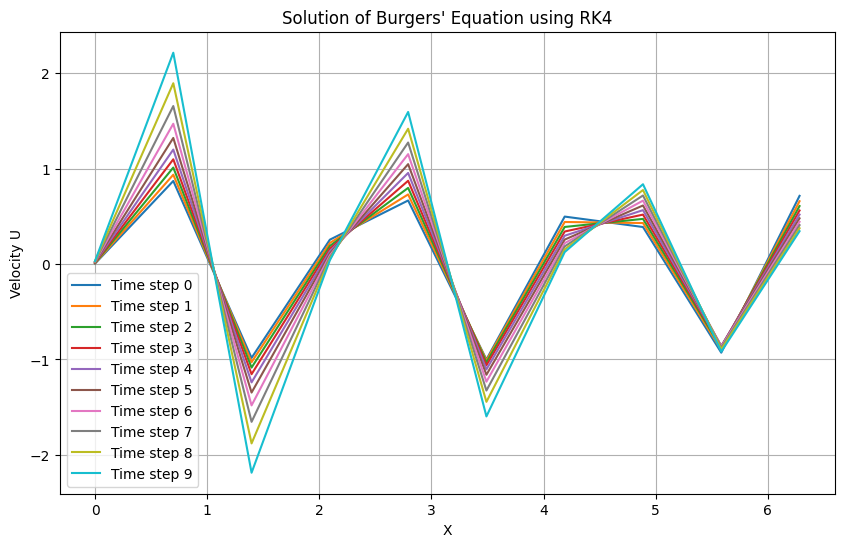

In [27]:
import numpy as np
import matplotlib.pyplot as plt


def burgers_equation(u, dx, nu):
    # Calculate the first derivative of u w.r.t x using central difference
    ux = (np.concatenate([u[1:], [u[0]]]) - np.concatenate([[u[-1]], u[:-1]])) / (2 * dx)
    # Calculate the second derivative of u w.r.t x using central difference
    uxx = (np.concatenate([u[1:], [u[0]]]) - 2 * u + np.concatenate([[u[-1]], u[:-1]])) / dx**2
    
    # Calculate the right hand side of Burgers' equation
    return -u * ux + nu * uxx

def rk4_step(u, dx, dt, nu):
    # Calculate the first intermediate step (k1) of the RK4 method
    k1 = burgers_equation(u, dx, nu)
    # Calculate the second intermediate step (k2) using k1
    k2 = burgers_equation(u + dt/2 * k1, dx, nu)
    # Calculate the third intermediate step (k3) using k2
    k3 = burgers_equation(u + dt/2 * k2, dx, nu)
    # Calculate the fourth intermediate step (k4) using k3
    k4 = burgers_equation(u + dt * k3, dx, nu)
    
    # Combine all intermediate T to Calculate the next time step value of u
    return u + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# Parameters:
L = 2 * np.pi  # Length of the space domain
N = 10  # Number of grid points in space domain
dx = L / N  # Distance between grid points
nu = 0.01  # Viscosity coefficient
dt = 0.1  # Time step size
T = int(1 / dt)  # Total number of time steps

# Initial condition:
x = np.linspace(0, L, N)
u = np.sin(np.pi * x)

# Prepare the plot
plt.figure(figsize=(10, 6))

# Evaluation using the RK4 method
for step in range(T):
    u = rk4_step(u, dx, dt, nu)
    # Plot each time step
    plt.plot(x, u, label=f'Time step {step}')

plt.title("Solution of Burgers' Equation using RK4")
plt.xlabel('X')
plt.ylabel('Velocity U')
plt.grid()
plt.legend()
plt.show()